<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/MAT_421_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building an MLB ERA Prediction Model through Regression Technique**

**MAT 421-Haiyan Wang**

**By Devin Monroy**


# **Abstract**
The primary objective of this project was to develop a reasonable ERA prediction model based on MLB team data from the $2024$ season. Firstly, a correlation analysis was performed to narrow our analysis to the $10$ highest correlated values about ERA. Then, through Multiple Linear Regression, Polynomial Regression, and Cubic Spline Regression, it was found that Multiple Linear Regression would be the best analysis to use on our data. Furthermore, through more linear regression testing, it was found that Fielding Independent Pitching (FIP), ERA+, Strikeout Percentage (SO%), and WHIP were our strongest predictors of ERA. From this we were able to produce the following final regression equation:

$2.8549 + 0.0882$(FIP) $-0.0172$(ERA+) $-0.0348$(SO%) $+2.6705$(WHIP)

 The model was then trained through data from the 2024 season; it was applied to the top 500 pitchers in innings pitched (IP) from the 2024 season. Our final model resulted in a Mean Absolute Error (MAE) of $0.469$, a Root Mean Squared Error (RMSE) of $0.716$, and an $R^2$ value of $0.697$, suggesting to us that relatively few variables could be used to produce a seemingly useful predictive model.   

# **Introduction**
Over the last decade, statistical data has become more prevalent in the game of baseball. Specifically, since $2015$, with the widespread implementation of the Statcast system in MLB. The Statcast system is a high-tech camera system (known as the Hawk-Eye system) that collects all kinds of baseball-related statistical data, for example, the sprint speed of a batter or the specific movement patterns of pitches involving spin rate, vertical drop, and horizontal movement (Statcast: Glossary).

This influx of statistical data is not just for the avid baseball fan, rather, it is a critical tool MLB front offices use to assess current players and even scout potential new players. Over the years, the baseball industry has discovered that no two fastballs are the same, even if identical velocities, factors such as Induced Vertical Break, Horizontal Break (run/tail), and arm slot angle have proven to be instrumental in getting the best performance out of players (Taruskin).

However, one stat has withstood the test of time and is one of the quickest ways of evaluating the overall success, that being Earned Run Average (ERA). For those unfamiliar, ERA can be defined as the earned run average a pitcher allows throughout a complete game ($9$ innings). Unlike many of the more advanced pitching metrics available, ERA is easily accessible, and if you turn on any MLB broadcast, they are guaranteed to display the ERA of the in-game pitcher. Due to this fact of its simplicity, it becomes pertinent to try and find a model that helps predict the future ERA of a pitcher based on other more specialized stats.

Thus, this project aims to develop a relatively simple but effective ERA prediction model, using somewhat standard pitcher statistics (ERA+ being the only advanced stat). Multiple Linear Regression will be one of the foundational tools in this modeling process, alongside Polynomial Regression, Cubic Spline Regression, and Variance Inflation Factor (VIF) analysis as a means to ensure model stability. The goal is to build a model that not only fits historical data well but also works to apply to pitchers of the future. This will be demonstrated by testing it on individualized 2024 season pitching data.



# **Math Methods**
A correlation analysis was performed between ERA and possible independent variables. In short, a correlation analysis measures the strength and type (positive or negative) linear relationship between two variables. The correlation coefficient r will have a value between $-1$ and $1$. Values between $0$ to $1$ indicate a positive correlation, whereas values between $-1$ to $0$ indicate a negative correlation. An $|r|$ closer to 1 indicates a stronger correlation (Turney).  

Three primary forms of regression were used throughout this project, including Multiple Linear, Polynomial, and Cubic Spline.
Multiple Linear Regression measures the relationship between our dependent variable (ERA in our case) and multiple independent variables to predict our dependent variable. The general form of a Multiple Linear Regression model is as follows:

$Y = \beta_0 + \beta_1x_1 +  \beta_2x_2 + ….. +  \beta_nx_n + \epsilon $

Where Y is our dependent variable, $\beta_0$ is the intercept, $ \beta_1$ to $ \beta_n$ are the coefficients for each predictor, and $\epsilon$ is our error term if necessary (Taylor). During our regression fitting, the least squares method is used to estimate our $\beta$ parameters by minimizing the sum of squares of our residual data. Our residual data is the difference between observed and predicted values.

Polynomial Regression is similar to linear regression in that the goal is the same, however, the implementation differs. In this model, the dependent variable (ERA) and the independent variables' relationship are modeled using an nth-degree polynomial and are better suited for nonlinear data types compared to linear regression (Spanton). The general form of Polynomial Regression is as follows:

$Y = \beta_0 + \beta_1x^2 +  \beta_2x^2 + ….. +  \beta_nx^n + \epsilon $

The variables are defined the same as in Multiple Linear Regression.

Finally, Cubic Spline Regression, similar to Polynomial Regression, is used for more complex nonlinear relationships between variables. The process involves separating the range of independent variables into certain intervals based on a point, which is referred to as a knot. The model then fits this not to a cubic polynomial function, which ensures a smooth a continuous relationship is created at least up until the $2$nd degree (Jackson).


# **Implementation**
All the analysis of this project was done in the Jupyter Notebook Google Colab. The code was written in the Python programming language. The following Python libraries were used in our analysis:

* Pandas: Used for data storage and manipulation, and useful when working with

* CSV data types, as in the case of this project.    

* NumPy: Provides various mathematical operations.

* Seaborn: A visual package that works in conjunction with matplotlib

* Matplotlib: The default Python plotting library used for creating graphs, plots, and charts.

* Statsmodels: Useful for more advanced modeling, such as certain regressions that were used throughout this project.

* Scikit-learn: Standard Python learning machine, used to train our models  

* SciPy: Helps with smoothing of data, which is important when dealing with baseball-related statistical data, as it tends to contain a lot of noise.


# **Data and Comparison Study**
The primary motive behind this analysis project is based on the results of another project. A research paper by Tejas Oberoi sought to measure the predicted efficiency of a pitcher based on individualized pitch characteristics such as spin rate, velocity, release height and extension, and vertical and horizontal movement patterns. They hypothesized that pitch characteristics alone could account for more than $50$% of the variance $(R^2)$ in pitchers' performance (Oberoi). Specifically, Oberoi tried to predict walkis + hits per inning pitched (WHIP), batting average against (BAA), and fielding independent pitching (FIP) through a combination of neural network analysis and linear regression (Oberoi). However, they found that their hypothesis was to be rejected as they found their coefficients of determination $(R^2)$ to be the following:

* WHIP: $R^2 = 0.28$

* BAA: $R^2 = 0.17$
* FIP: $R^2 = 0.29$

Thus, when it came time to perform a similar project, this time choosing to predict ERA, I chose to leave out physical pitch characteristics as it seems those are not great evaluators on their own/without situational context. For my data I used pitching data from the 2024 season, the average pitching statistics of OPS, SLG, WHIP, OBP, BA, H9, ERA+, SO%, FIP, SO/W, SO9, BABIP, HR9, BB9, LOB, BB%, HARDH%, EV, LD%, HR%, GB/FP, GB%, and FB% for all 30 MLB teams. Additionally, I used a data set containing some of the same variables but for individual pitchers, specifically the top 500 pitchers in terms of innings pitched.

# **Results and Methodology**
Firstly, a correlation analysis of the independent variables mentioned previously with ERA was conducted, from which the 10 variables with the highest correlation coefficient $|r|$ were chosen to proceed with our regression analyses. The results of this correlation analysis are seen below, where we see that OPS has the highest $r$ value of 0.96 and the lowest (least correlated) being FB%.

Saving Cleaned_Baseball_Data_new.csv to Cleaned_Baseball_Data_new (5).csv
No Erro


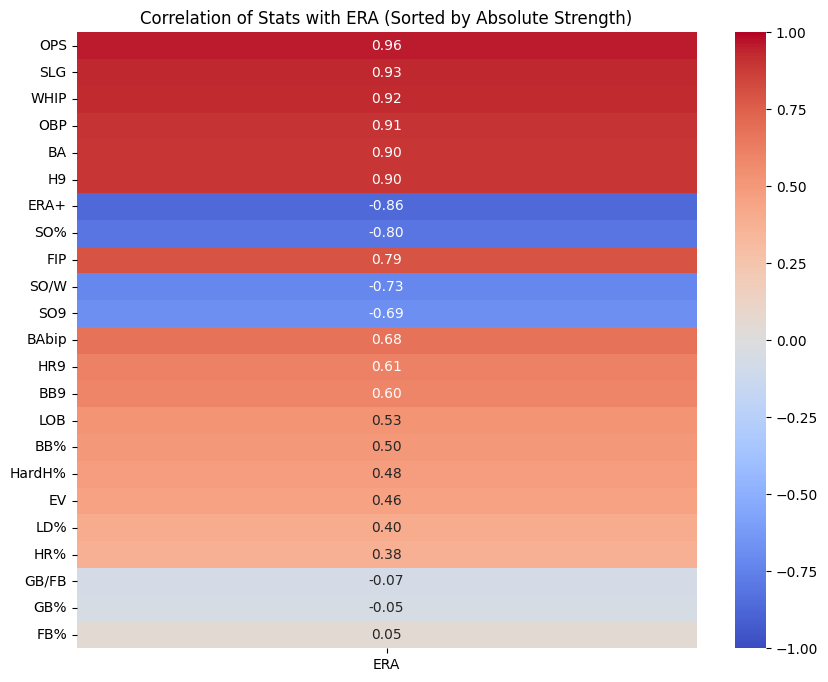

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Possible ndependent variables
target_column = 'ERA'
stat_columns = [
    'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB',
    'BA', 'OBP', 'SLG', 'OPS', 'BAbip', 'HR%', 'SO%', 'BB%',
    'EV', 'HardH%', 'LD%', 'GB%', 'FB%', 'GB/FB'
]
missing = [col for col in stat_columns + [target_column] if col not in df.columns]
if missing:
    print(f"Error Missing data: {missing}")
else:
    print("No Error")

# Correlations sorted by absolute value
correlations = df[[target_column] + stat_columns].corr()[target_column].drop(target_column)
correlations_sorted = correlations.iloc[(-correlations.abs()).argsort()]  # Sort by absolute value

# Plot as heat map
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlations_sorted.to_frame(),
    annot=True,
    cmap='coolwarm',
    cbar=True,
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation of Stats with ERA (Sorted by Absolute Strength)')
plt.show()

After the 10 best variables were selected, we now perform our initial round of regression models, which are shown below.

Saving Cleaned_Baseball_Data_new.csv to Cleaned_Baseball_Data_new (3).csv


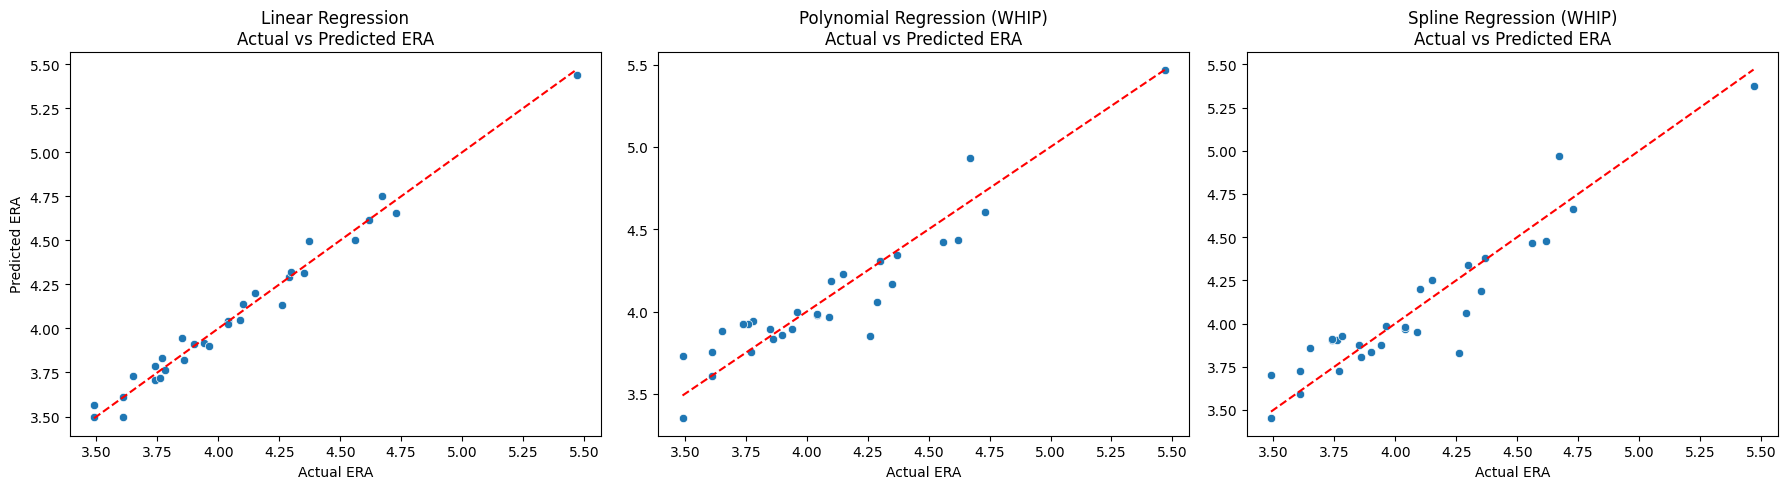

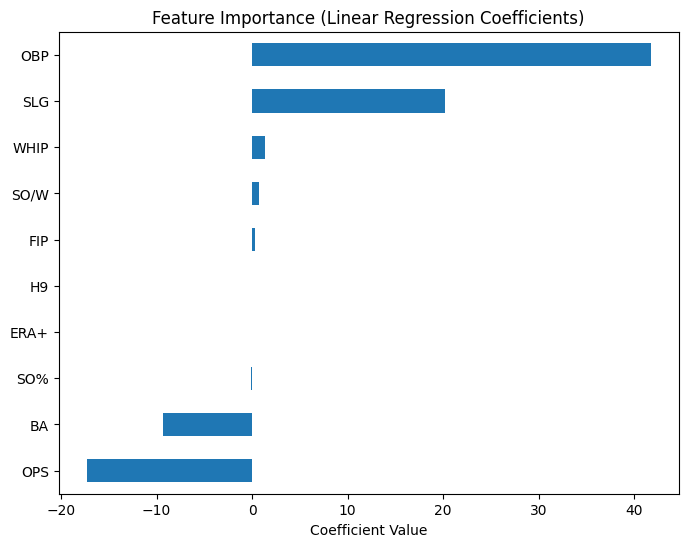

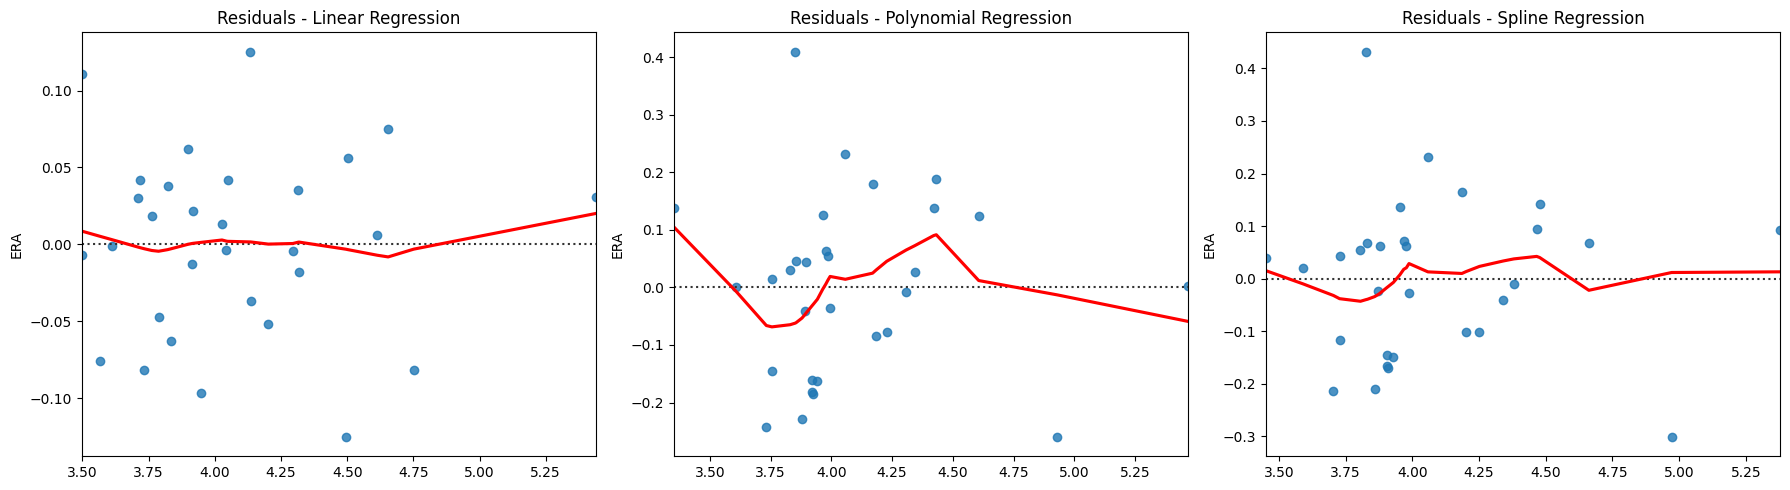


🔎 Final Model Comparison:
                              Model  Cross-Validated R²  Cross-Validated RMSE
0                 Linear Regression            0.911699              0.105203
1           Cubic Spline Regression            0.878618              0.149501
2  Polynomial Regression (degree 2)            0.652060              0.214414
🔢 Final ERA Prediction Formula:
(-17.2925) × OPS + (20.1502) × SLG + (1.3561) × WHIP + (41.7223) × OBP + (-9.2898) × BA + (-0.0044) × H9 + (-0.0151) × ERA+ + (-0.0663) × SO% + (0.2672) × FIP + (0.7214) × SO/W + (-4.1952)


In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Variables
features = ['OPS', 'SLG', 'WHIP', 'OBP', 'BA', 'H9', 'ERA+', 'SO%', 'FIP', 'SO/W']
X = df[features]
y = df['ERA']


df_clean = df.dropna(subset=features + ['ERA'])
X = df_clean[features]
y = df_clean['ERA']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate models
def cross_validate_model(model, X, y):
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
    return np.mean(r2_scores), np.mean(rmse_scores)

# Multiple Linear Regression
model_lr = LinearRegression()
r2_lr, rmse_lr = cross_validate_model(model_lr, X, y)
# Train on full data
model_lr.fit(X, y)
y_pred_lr = model_lr.predict(X)

# Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
r2_poly, rmse_poly = cross_validate_model(poly_model, X[['WHIP']], y)
# Train on full data
poly_model.fit(X[['WHIP']], y)
y_pred_poly = poly_model.predict(X[['WHIP']])

# Step 5: Cubic Spline Regression
# Sort by WHIP for spline
X_spline_sorted = X['WHIP'].sort_values()
y_spline_sorted = y.loc[X_spline_sorted.index]
spline = UnivariateSpline(X_spline_sorted, y_spline_sorted, k=3, s=1)
y_pred_spline = spline(X_spline_sorted)
#R² and RMSE
r2_spline = r2_score(y_spline_sorted, y_pred_spline)
rmse_spline = np.sqrt(mean_squared_error(y_spline_sorted, y_pred_spline))

# Plot Actual vs Predicted for Each Model
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(x=y, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Linear Regression\nActual vs Predicted ERA')
plt.xlabel('Actual ERA')
plt.ylabel('Predicted ERA')

plt.subplot(1,3,2)
sns.scatterplot(x=y, y=poly_model.predict(X[['WHIP']]))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Polynomial Regression (WHIP)\nActual vs Predicted ERA')
plt.xlabel('Actual ERA')

plt.subplot(1,3,3)
sns.scatterplot(x=y_spline_sorted, y=y_pred_spline)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Spline Regression (WHIP)\nActual vs Predicted ERA')
plt.xlabel('Actual ERA')

plt.tight_layout()
plt.show()

# Feature importance (for linear regression)
feature_importance = pd.Series(model_lr.coef_, index=features).sort_values()

plt.figure(figsize=(8,6))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

# Residual plots
residuals_lr = y - y_pred_lr
residuals_poly = y - poly_model.predict(X[['WHIP']])
residuals_spline = y_spline_sorted - y_pred_spline

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.residplot(x=y_pred_lr, y=residuals_lr, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals - Linear Regression')

plt.subplot(1,3,2)
sns.residplot(x=poly_model.predict(X[['WHIP']]), y=residuals_poly, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals - Polynomial Regression')

plt.subplot(1,3,3)
sns.residplot(x=y_pred_spline, y=residuals_spline, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals - Spline Regression')

plt.tight_layout()
plt.show()

# Comparison Table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (degree 2)', 'Cubic Spline Regression'],
    'Cross-Validated R²': [r2_lr, r2_poly, r2_spline],
    'Cross-Validated RMSE': [rmse_lr, rmse_poly, rmse_spline]
})

print("\n Model Comparison:")
print(comparison_df.sort_values(by='Cross-Validated R²', ascending=False).reset_index(drop=True))
coefficients = model_lr.coef_
intercept = model_lr.intercept_

print("ERA Prediction Formula:")

for feature, coef in zip(features, coefficients):
    print(f"({coef:.4f}) × {feature} + ", end='')

print(f"({intercept:.4f})")

In [ ]:
# Removing OPS and BA from features
features_new = ['SLG', 'WHIP', 'OBP', 'H9', 'ERA+', 'SO%', 'FIP', 'SO/W']
X_new = df_clean[features_new]
y_new = df_clean['ERA']

# Refit
model_new = LinearRegression()
model_new.fit(X_new, y_new)

# Print new prediction formula
print("New ERA Prediction Formula (without OPS and BA):")
for feature, coef in zip(features_new, model_new.coef_):
    print(f"({coef:.4f}) × {feature} + ", end='')

print(f"({model_new.intercept_:.4f})")

# VIF
X_vif = sm.add_constant(X_new)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                    for i in range(X_vif.shape[1])]

print("\n Variance Inflation Factors (VIF):")
print(vif_data)

🔢 New ERA Prediction Formula (without OPS and BA):
(2.5834) × SLG + (1.4314) × WHIP + (24.1936) × OBP + (-0.2078) × H9 + (-0.0154) × ERA+ + (-0.0595) × SO% + (0.3024) × FIP + (0.7490) × SO/W + (-5.0170)

🔎 Variance Inflation Factors (VIF):
  Feature           VIF
0   const  11534.750514
1     SLG     18.459826
2    WHIP    252.174270
3     OBP     67.177449
4      H9    146.738143
5    ERA+      3.019108
6     SO%     27.942528
7     FIP     15.715363
8    SO/W     65.563492


In [ ]:
# Final cleaned feature set
features_final = ['FIP', 'ERA+', 'SO%', 'WHIP']
X_final = df_clean[features_final]
y_final = df_clean['ERA']

# Refit
model_final = LinearRegression()
model_final.fit(X_final, y_final)

# Formula
print("Final Clean ERA Prediction Formula:")
for feature, coef in zip(features_final, model_final.coef_):
    print(f"({coef:.4f}) × {feature} + ", end='')
print(f"({model_final.intercept_:.4f})")

# VIF check
X_vif_final = sm.add_constant(X_final)
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = X_vif_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_vif_final.values, i)
                         for i in range(X_vif_final.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data_final)

🔢 Final Clean ERA Prediction Formula:
(0.0882) × FIP + (-0.0172) × ERA+ + (-0.0348) × SO% + (2.6705) × WHIP + (2.8549)

🔎 Variance Inflation Factors (VIF):
  Feature          VIF
0   const  3557.555694
1     FIP     3.130278
2    ERA+     2.470082
3     SO%     3.134267
4    WHIP     3.779879


In [18]:
# ERA calculator tool
def predict_clean_ERA(FIP, ERA_plus, SO_percent, WHIP):
    # Plug in using your new model's coefficients and intercept
    predicted_ERA = (
        (0.0882) * FIP +
        (-0.0172) * ERA_plus +
        (-0.0348) * SO_percent +
        (2.6705) * WHIP +
        (2.8549)
    )
    return predicted_ERA

# 2025 Zack Wheeler used as an example
FIP = float(input("Enter FIP: "))
ERA_plus = float(input("Enter ERA+: "))
SO_percent = float(input("Enter SO% (as number, not decimal): "))
WHIP = float(input("Enter WHIP: "))

predicted_ERA = predict_clean_ERA(FIP, ERA_plus, SO_percent, WHIP)
print(f"\nPredicted ERA: {predicted_ERA:.2f}")

Enter FIP: 3.17
Enter ERA+: 112
Enter SO% (as number, not decimal): 34
Enter WHIP: 1.018

🎯 Predicted ERA: 2.74


Saving TOP 500 PITHCERS IP MAT 421.csv to TOP 500 PITHCERS IP MAT 421 (1).csv

🔎 Model Performance on 2024 Pitchers:
MAE: 0.469
RMSE: 0.716
R²: 0.697


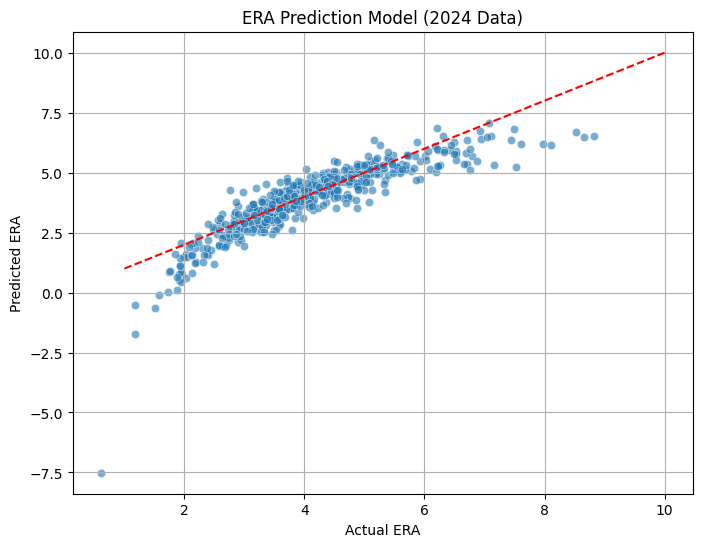

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    df_2024 = pd.read_csv(filename, encoding='latin1')  #

# Model coefficients
coef_FIP = 0.0882
coef_ERA_plus = -0.0172
coef_SO_percent = -0.0348
coef_WHIP = 2.6705
intercept = 2.8549

# ERA prediction
def predict_ERA(FIP, ERA_plus, SO_percent, WHIP):
    return (
        coef_FIP * FIP +
        coef_ERA_plus * ERA_plus +
        coef_SO_percent * SO_percent +
        coef_WHIP * WHIP +
        intercept
    )

df_2024['Predicted_ERA'] = predict_ERA(
    df_2024['FIP'],
    df_2024['ERA+'],
    df_2024['SO%'],
    df_2024['WHIP']
)

mae = mean_absolute_error(df_2024['ERA'], df_2024['Predicted_ERA'])
rmse = np.sqrt(mean_squared_error(df_2024['ERA'], df_2024['Predicted_ERA']))
r2 = r2_score(df_2024['ERA'], df_2024['Predicted_ERA'])

print("\nModel Performance on 2024 Pitchers:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Plot actual vs predicted ERA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ERA', y='Predicted_ERA', data=df_2024, alpha=0.6)
plt.plot([1, 10], [1, 10], 'r--')  # Perfect prediction line
plt.xlabel('Actual ERA')
plt.ylabel('Predicted ERA')
plt.title('ERA Prediction Model (2024 Data)')
plt.grid(True)
plt.show()

# Generate results as seperate csv
df_2024.to_csv('ERA_Predictions_2024.csv', index=False)
files.download('ERA_Predictions_2024.csv')

# **Conclusion**
In completing this project a valid MLB ERA predictive model was created using Multiple Linear Regression. We were able to refine our model through variable selections processes such as correlation and variance inflation factor analyses. Our final model showed signs of being useful with an $R^2$ of $0.697$ and a Means Absolute Error of $0.469$ when our model was tested on individual pitcher data from the 2024 season. However we do note the weaknesses of our analysis in that for future projects it may be beneficial to work with various amounts of non-linear models due to the complexity and noisiness that is inherent when working with baseball statistics. We also note that our regression model may have been improved upon by adding interaction terms to our final model due to the nature of how related some of our independent variables are, in the final model perhaps an interaction term between FIP and WHIP. If this analysis was to be performed again, a larger data set would have been used to base our initial correlation and regression off. Perhaps it would have been beneficial to work with the data of the top 500 pitchers in terms of IP for the last several years. This way we ensure we capture any possible trends that may exist on a year to year basis. Overall our analysis proves to be a foundational starting point for future research to build off of, and we say that our analysis builds upon the works of others as noted previously in this report.
